## Трек «CV-инженер» 
### Skillfactory: DSPR-19
### Модуль 7. Задача классификации изображений. Часть II 

### 1. Что вас ждёт в этом модуле?

→ В прошлом модуле вы узнали о первых архитектурах и подходах к решению задачи классификации. Теперь мы готовы познакомиться с более продвинутыми моделями.

### В ЭТОМ МОДУЛЕ МЫ РАЗБЕРЁМ:

- как устроены архитектуры Inception, ResNet и Inception-ResNet;

- что такое групповые свёртки, Dense-блок и SE-блок;

- как модели могут генерировать другие модели на примере NASNet;

- как оптимально масштабировать сети для увеличения точности на примере EfficientNet.

### ВЫ НАУЧИТЕСЬ:

- применять модель ResNet для классификации изображений;

- дообучать готовые нейросети.

### 2. Семейство Inception и Inception-v3

⛏ Мы разобрали ряд знаковых архитектур до 2014 года, показавших передовое качество в задаче классификации изображений, в частности на датасете ImageNet. Победителем выступила архитектура GoogLeNet, она же Inception-v1. Процент ошибок этой архитектуры был немногим больше 6, в то время как человек, натренированный на решение такой же задачи, допускает в среднем около 5 % ошибок.

- Кто же всё-таки смог обойти человека?

В 2015 году были представлены две новые знаковые архитектуры. Давайте их рассмотрим.

За год, прошедший с предыдущего конкурса на базе датасета ImageNet, разработчики из Google провели ряд улучшений в принципах построения архитектур семейства Inception. В качестве кандидата на победу была выставлена архитектура Inception-v3 — результат третьей итерации улучшений. Разберём эти улучшения подробнее.

Архитектура Inception-v3 сконцентрировалась на изменениях, позволяющих эффективнее достигать схожих с первой версией результатов с применением ещё меньших вычислительных затрат за счёт изменений в маленьких блоках сети.

**Рассмотрим поэтапные улучшения, которые были произведены:**

**1) Факторизация свёрток**

Вместо свёртки размером K x K мы можем применить последовательно две свёртки 1 x K и K x 1, что эффективно будет задействовать те же области на изображении/признаках, к которым они применяются, а значит можно надеяться, что и результативность «просядет» не сильно. Однако при этом мы сильно сокращаем как количество параметров, так и количество вычислений.

**2) Свёртки меньшего размера**

Вместо применения «больших» свёрток, таких как 5 x 5, 7 x 7 и других, мы можем последовательно применить несколько свёрток 3 x 3, идущих друг за другом. Как и в случае с факторизацией, эффективная область, признаки с которой будут задействованы в вычислениях, не меняется, при этом количество параметров уменьшается: например, в случае замены одной свёртки 5 x 5 на две свёртки 3 x 3 количество параметров уменьшается с 25 до 18.

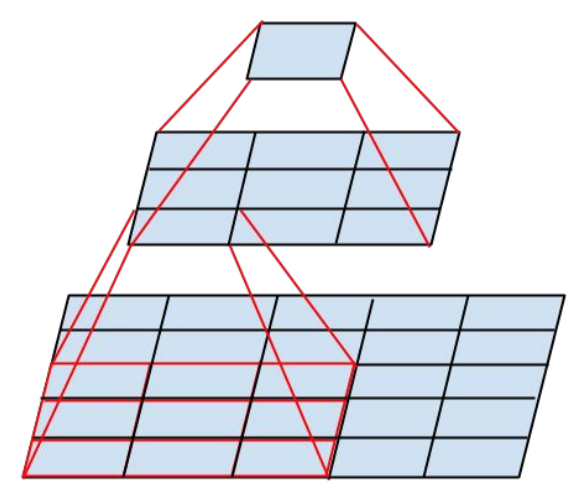

**3) Асимметричные свёртки**

Комбинируя два подхода с факторизацией и заменой на свёртки меньшего размера, мы можем изменить оригинальный блок Inception на блок нового вида, выполняющий схожую функцию. При этом он будет оптимальнее в плане количества используемых параметров, а следовательно, и скорости вычислений.

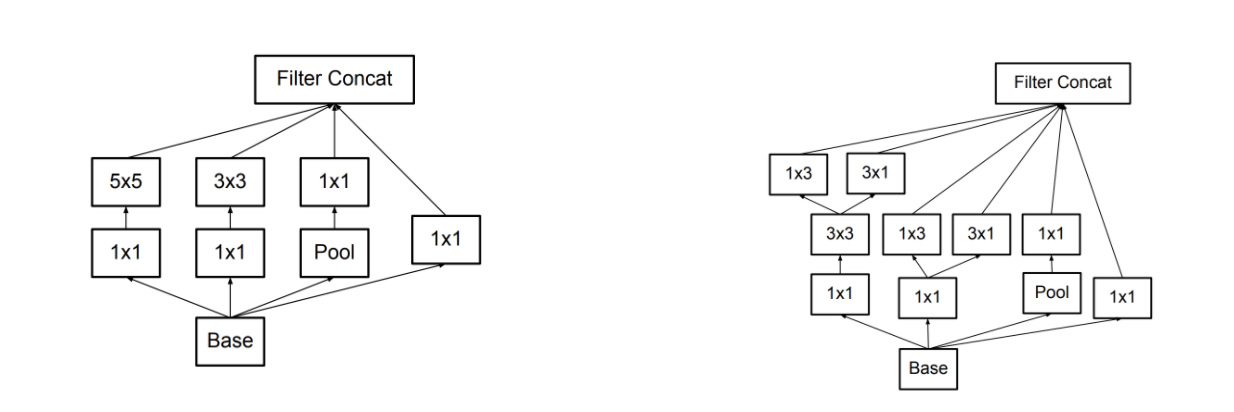

**4) Вспомогательный классификатор**

Как и в случае с первой итерацией архитектуры, между некоторыми основными слоями сети на стадии обучения мы добавляем ответвление в виде небольшой свёрточной сети, функция потерь которой прибавляется с некоторым весом к функции потерь всей сети. При этом в случае GoogLeNet вспомогательные классификаторы позволяли сделать сеть глубже, а в случае Inception-v3 данное ответвление служило для регуляризации.

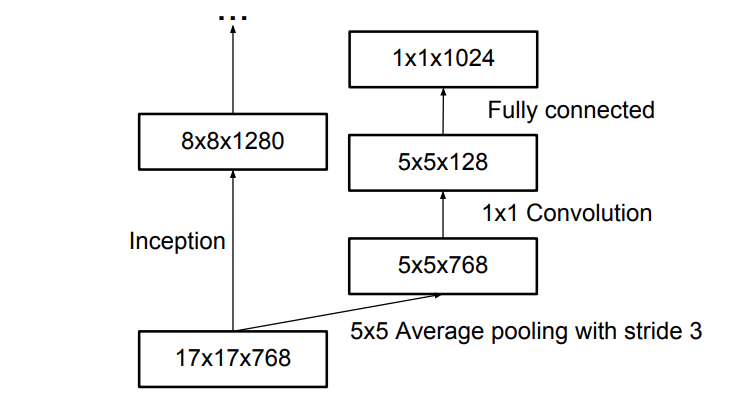

**5) Уменьшение размерностей**

Обычно для этого применяются операции пулинга между некоторыми слоями сети, но в случае Inception-v3 пулинговые операции «смешиваются» с операциями свёрток, которые также уменьшают размерность за счёт добавления шага (stride) величины 2 — часть уменьшения берёт на себя пулинг, часть выполняют свёртки. Их результаты затем объединяются по размерности, соответствующей количеству признаков.

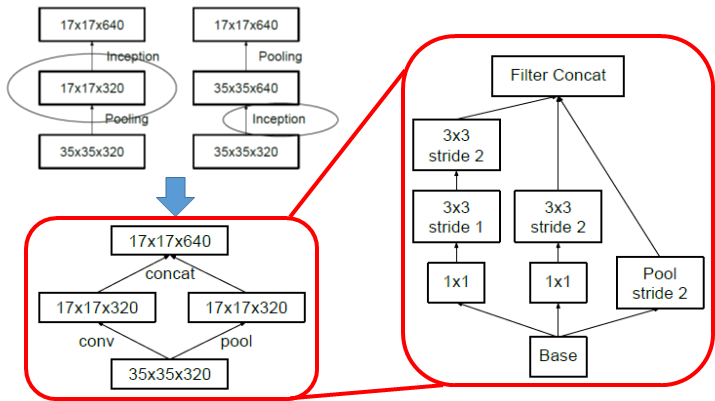

После всех проведённых улучшений в результате получаем архитектуру Inception-v3:

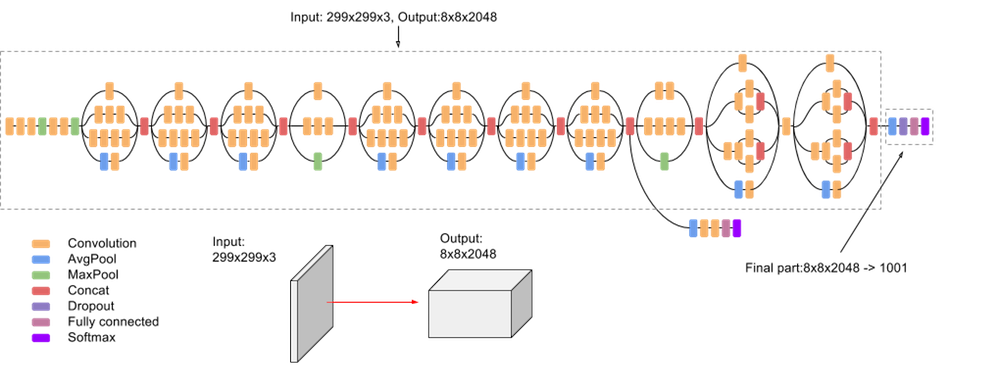

Итоговая ошибка на ImageNet — 5.6 %. Казалось, человек на этот раз устоял, но...

### Задание 2.1

Какое из этих улучшений не относится к архитектуре Inception-v3?
- Использование групповых свёрток

### Задание 2.2

Для чего в Inception-v3 был оставлен вспомогательный классификатор?
- Для регуляризации модели в процессе обучения

### 3. Семейство архитектур ResNet

⛏ В 2015 году было представлено еще одно семейство моделей — **ResNet.**

**ResNet** — результат творчества авторов из Microsoft Research Asia, представленный в работе Deep Residual Learning for Image Recognition (https://arxiv.org/pdf/1512.03385.pdf). Название ResNet является сокращением от Residual Networks.

- Что же такое residual?

Как мы помним по архитектуре VGG, в какой-то момент увеличение глубины сети уже не помогает сделать её точнее — всплывает проблема затухающего градиента. ResNet добавляет также residual mapping, или остаточное отображение. Посмотрим, как это выглядит, на примере одного residual-блока:

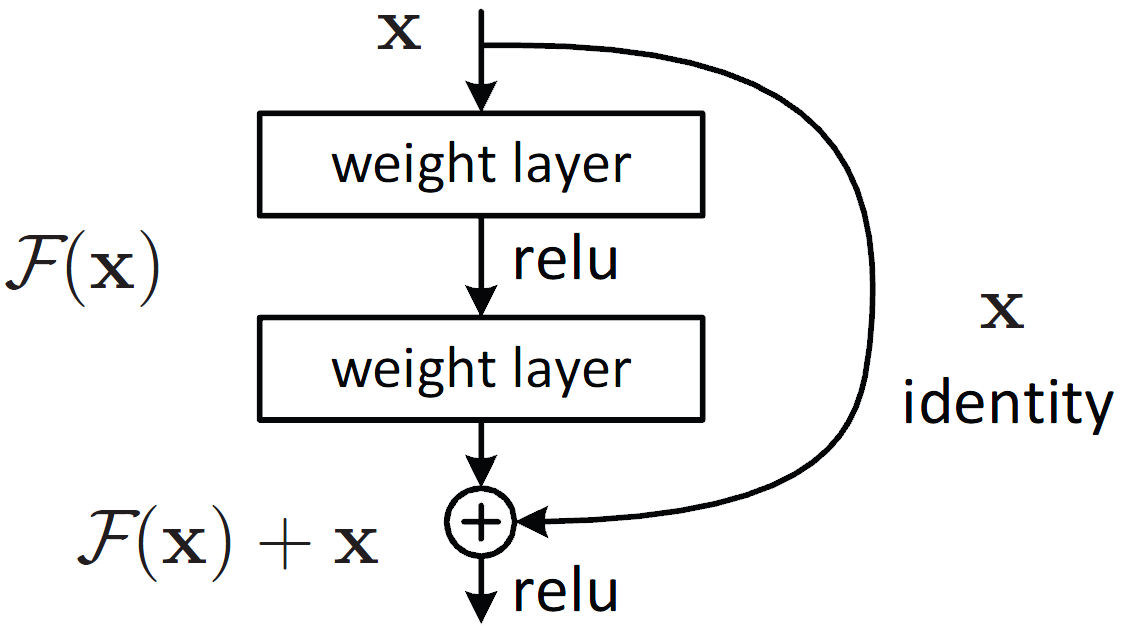
Источник изображения (https://arxiv.org/pdf/1512.03385.pdf)  

К стандартной последовательности из нескольких свёрточных слоёв добавляется дополнительное замыкающее соединение (shortcut connection) слева. Добавление такого блока к существующей сети приводит к тому, что вместо оптимизации новой комбинации F(G) вместе со старой G, как в случае «обычных» глубоких сетей, мы обучаем комбинацию F(G) + G.

Можно провести аналогию с бустингом, когда мы добавляем новую простую модель, за счёт которой пытаемся получить ещё более точную формулу для предсказаний — в крайнем случае, мы ничего не испортим (если вынести за скобки проблему переобучения). Также можно представить, что модель, практически целиком состоящая из таких конструкций, позволит избежать проблемы с затухающим градиентом — градиент всегда, как минимум, «пройдёт» по замыкающему соединению.

Сравним одну из версий ResNet глубины 34 с сетью VGG-19:

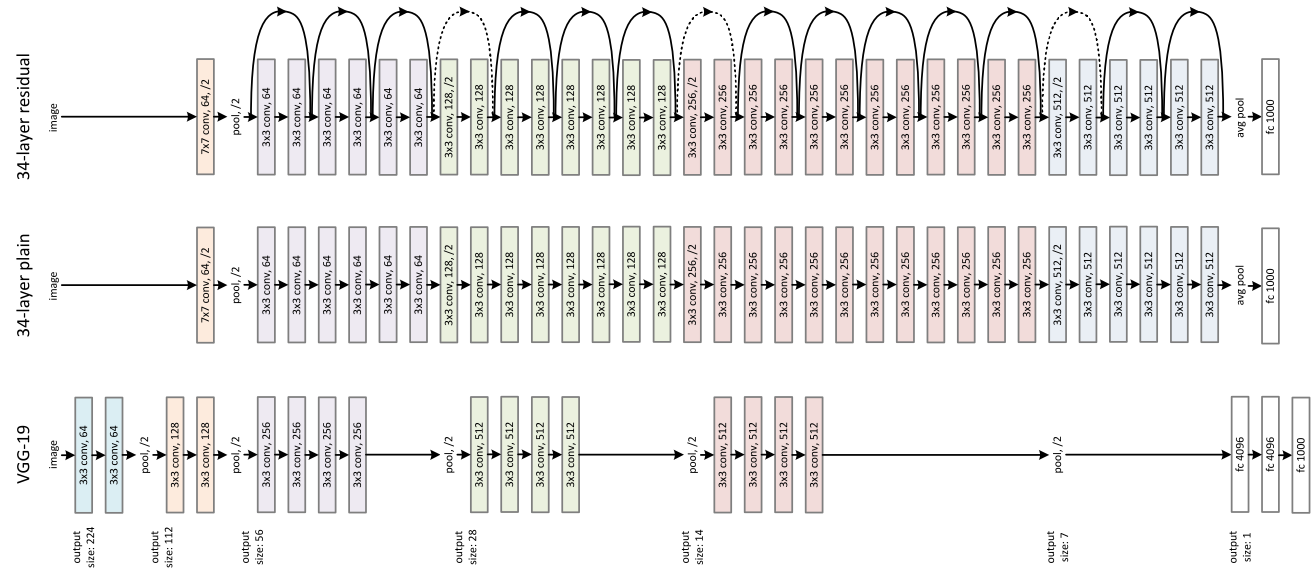
Источник изображения (https://arxiv.org/pdf/1512.03385.pdf)  

На рисунке выше приведены два варианта ResNet-34 — с добавлением замыканий и без них. Видно, что в целом архитектуры схожи по строению по модулю использования последовательностей свёрток, разделяемых пулингами (в ResNet, правда, в большинстве случаев вместо отдельного пулинга первая свёртка блока применяется с шагом 2, что эффективно приводит к схожему с пулингом эффекту).

Помимо использования замыкающих соединений, в ResNet используются свёртки с меньшим количеством фильтров, что положительно сказывается на скорости работы.
Ещё одно заметное отличие ResNet от VGG состоит в отсутствии полносвязных слоёв в конце — после применения всех свёрток к входному изображению 224 x 224 x 3 получим промежуточную карту вероятностей 7 x 7 x 1000, выходы которой просто усредняются пулингом average pooling 7 x 7 для получения финального вектора вероятностей.
Эти улучшения позволили обучать более глубокие нейросетевые модели.

Посмотрим на примере ResNet-18, как проходит обучение с добавлением замыкающих соединений и без них в стиле оригинальной VGG:

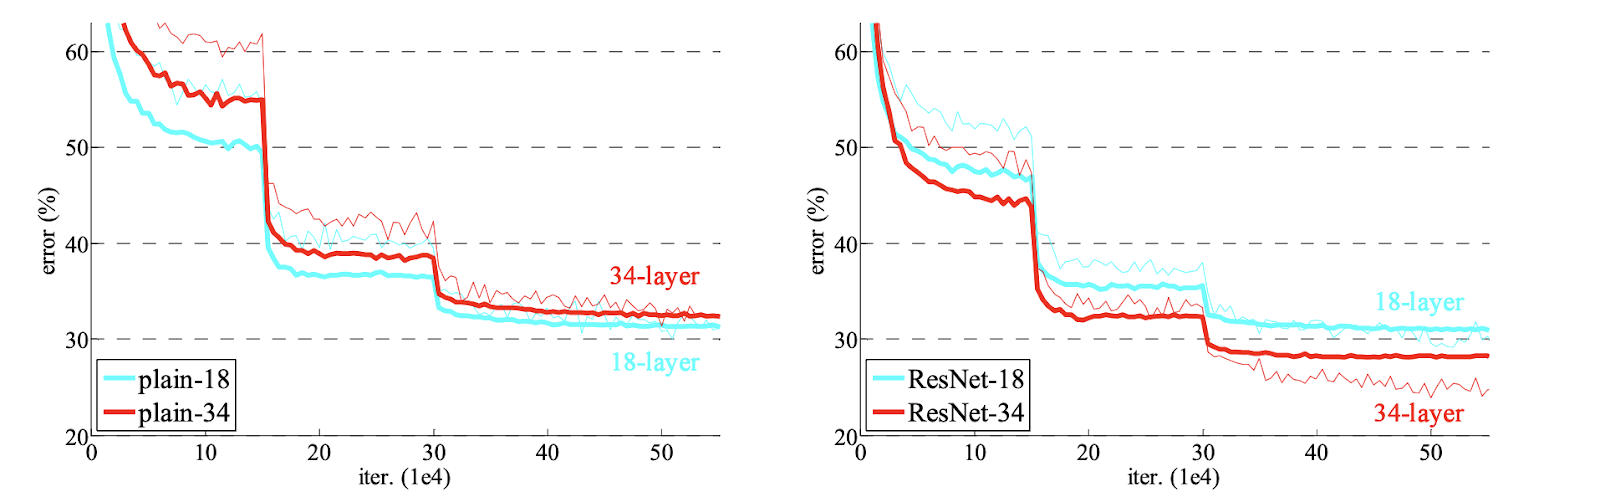
Источник изображения (https://arxiv.org/pdf/1512.03385.pdf)  

Видно, что новый вариант справляется лучше и при обучении, и на валидации.

Какого финального качества получается при этом достичь?

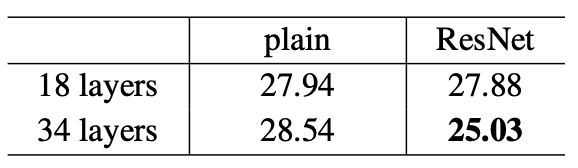
Источник изображения (https://arxiv.org/pdf/1512.03385.pdf)  

Residual-версия сети определённо лучше справляется при увеличении глубины!

Всего в оригинальной работе было представлено пять вариантов архитектур:

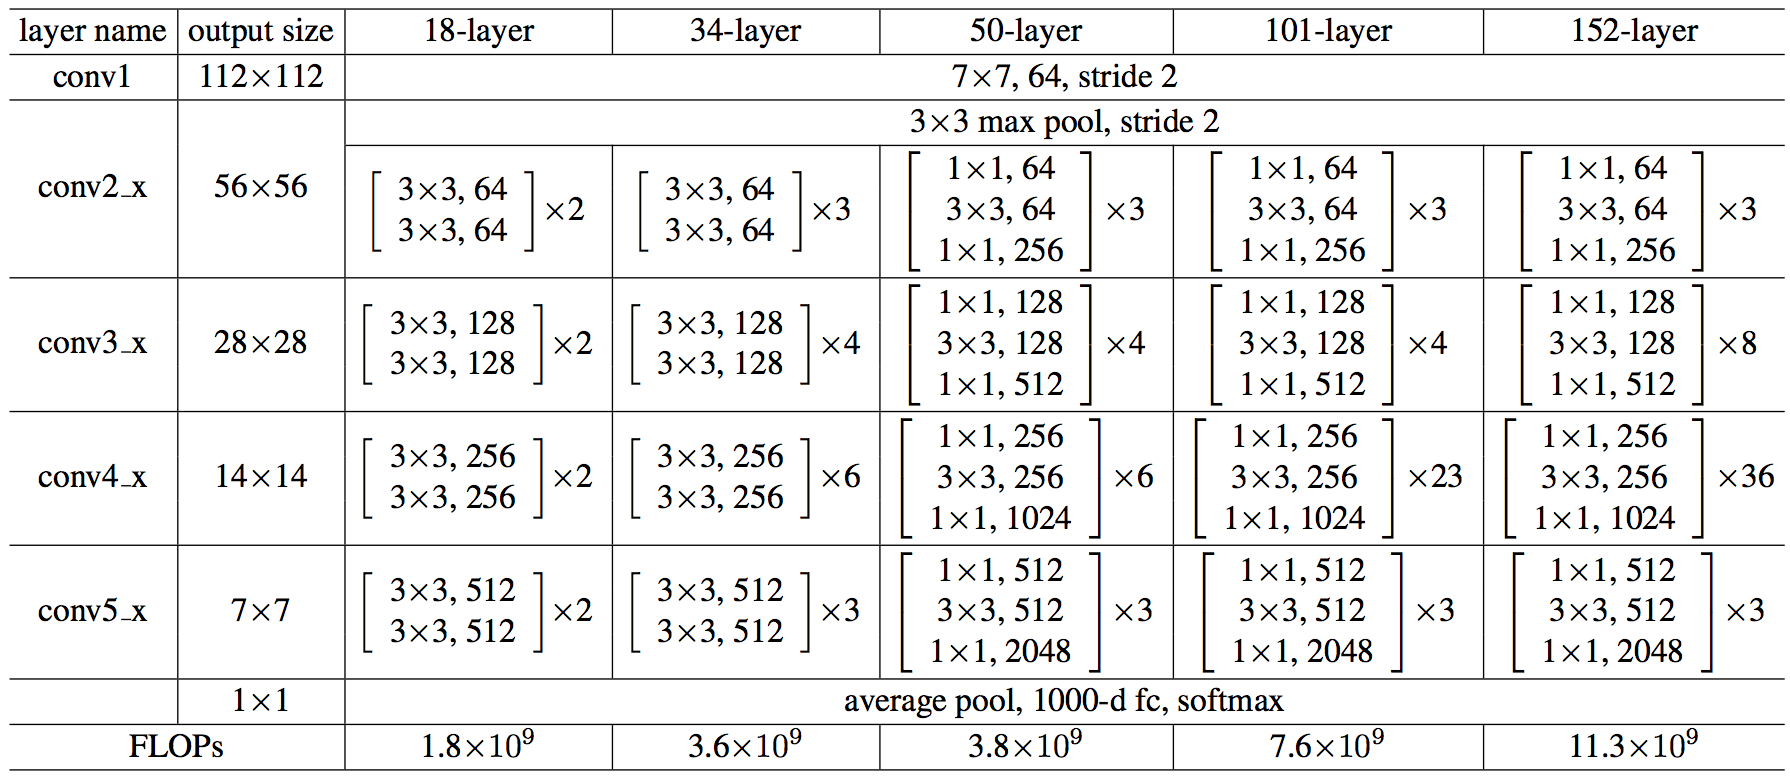
Источник изображения (https://arxiv.org/pdf/1512.03385.pdf)  

Внедрение residual-блоков позволило обучать сети из 152 слоёв!

К чему это в итоге привело? К победе над человеком в задаче классификации!

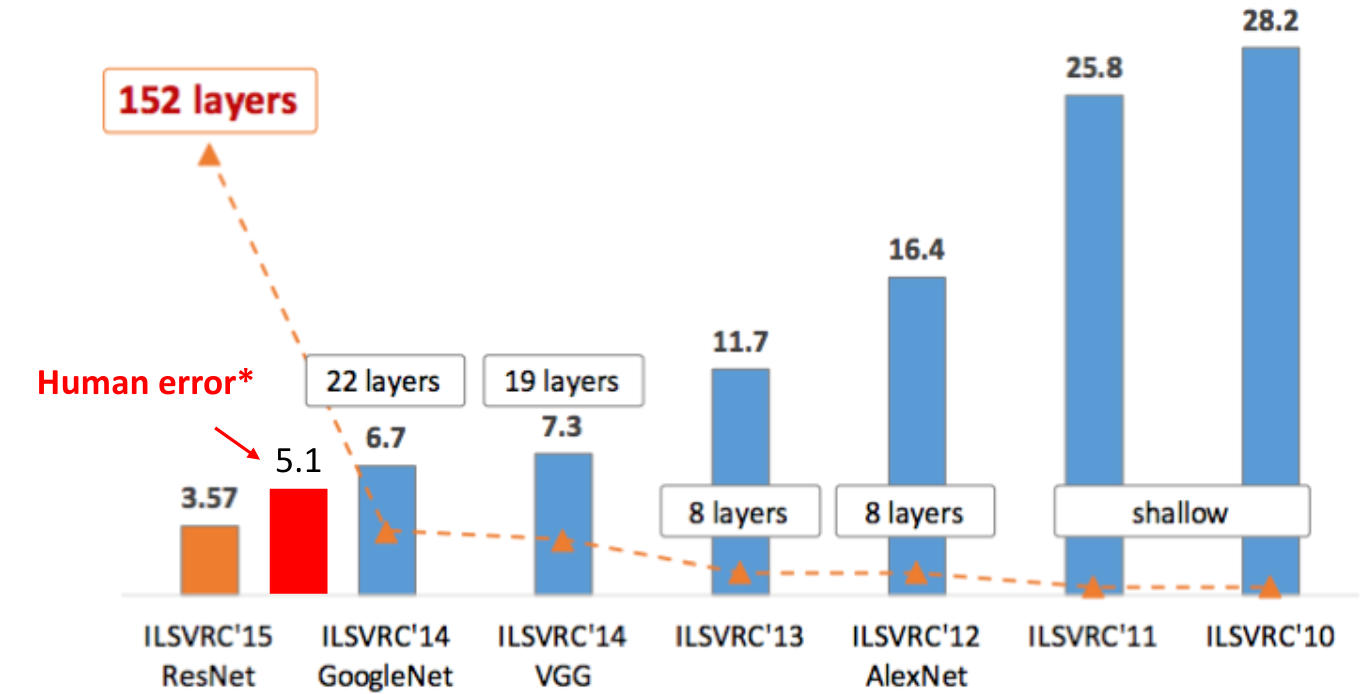

→ Кстати, 152 слоя — это не предел. Через некоторое время вышла отдельная работа Deep Residual Networks with 1k layers (https://github.com/KaimingHe/resnet-1k-layers), где авторы смогли достичь чуть более лучшего качества при обучении варианта сети ResNet, состоящего из 1001 слоя!

### Задание 3.1

Какое изменение позволило значительно увеличить глубину моделей ResNet?
- Добавление замыкающих соединений между слоями 

### Задание 3.2

За счёт чего в архитектуре ResNet происходит снижение размерности?  
- За счёт операции max pooling и свёрток с шагом (stride) 2 верно

### 4. Франкенштейн Inception-ResNet-V2

⛏ Так же, как когда-то после появления модели AlexNet многие исследователи стали применять свёрточные нейронные сети для решения задачи классификации изображений, после появления ResNet многие стали внедрять его главное улучшение — добавление skip-connections и residual-блоков. Не стеснялись этих заимствований и авторы второй по точности архитектуры Inception (https://arxiv.org/pdf/1602.07261.pdf). Давайте разберёмся, как дальше проходила эволюция Inception и чем всё закончилось.

Сначала была произведена дальнейшая работа над оригинальной концепцией Inception, и была представлена модель **Inception-v4** — более унифицированная, более простая из-за линейности и в то же время представляющая большее разнообразие Inception-блоков.

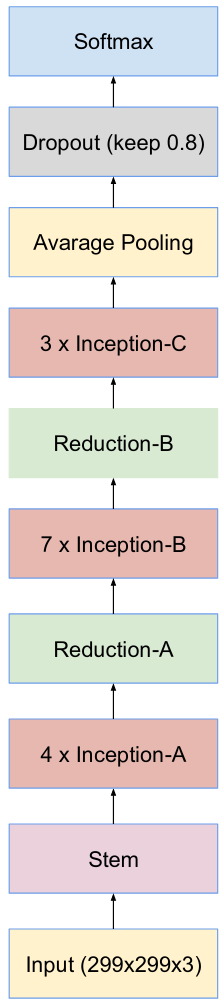
Общая структура Inception-v4  

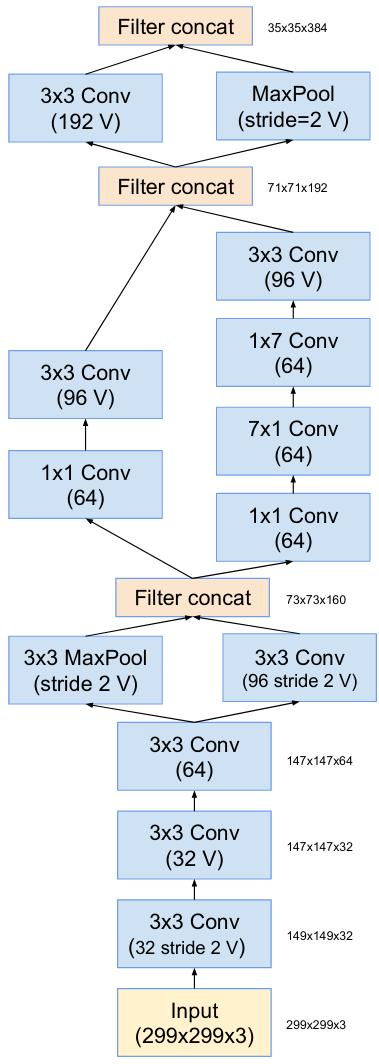
Блок Stem  

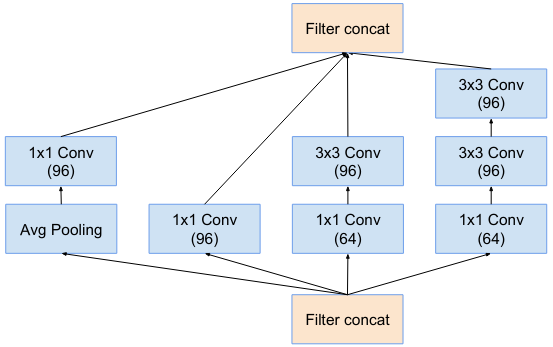
Блок Inception-A  

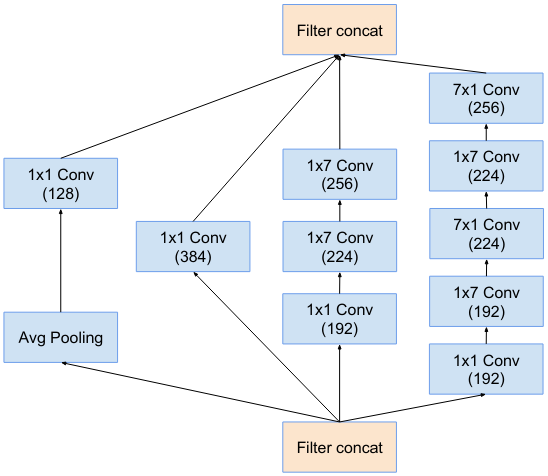
Блок Inception-B  

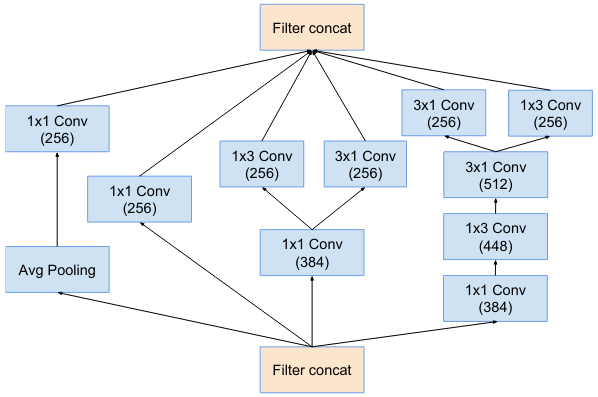
Блок Inception-C
Источник изображений (https://arxiv.org/pdf/1602.07261.pdf)

Данный вариант архитектуры всё ещё был «чистой» Inception-моделью.

Затем исследователи вооружились улучшениями из ResNet и создали варианты блоков Inception-A, Inception-B и Inception-C с добавленными skip connections. Так получилась первая версия гибридной архитектуры **Inception-ResNet-v1:**

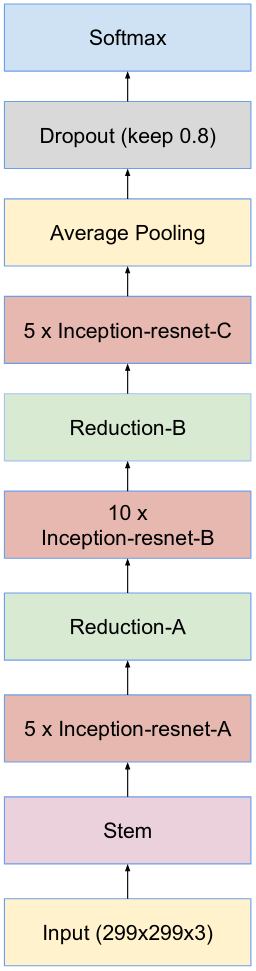
Общая структура Inception-ResNet-v1  

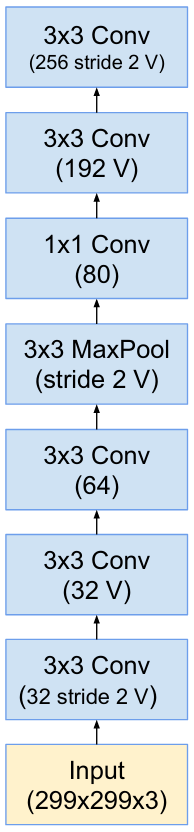
Блок Stem  

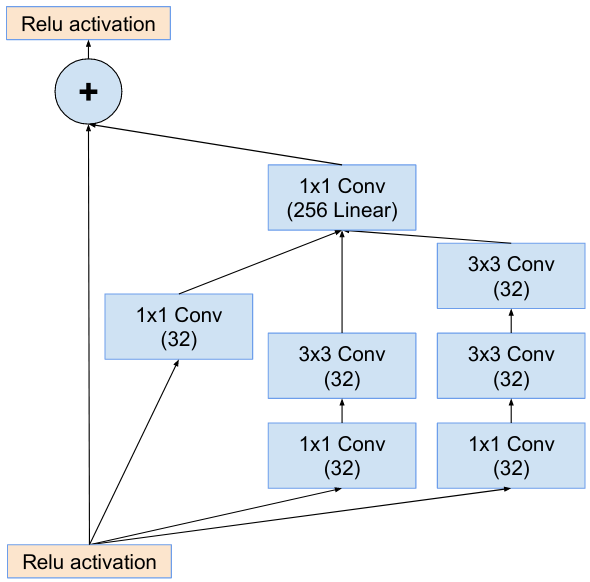
Блок Inception-ResNet-A  

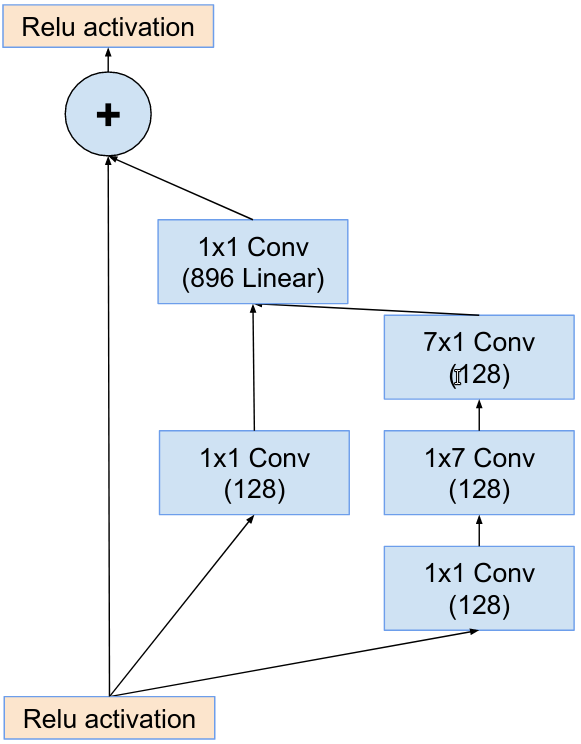
Блок Inception-ResNet-B  

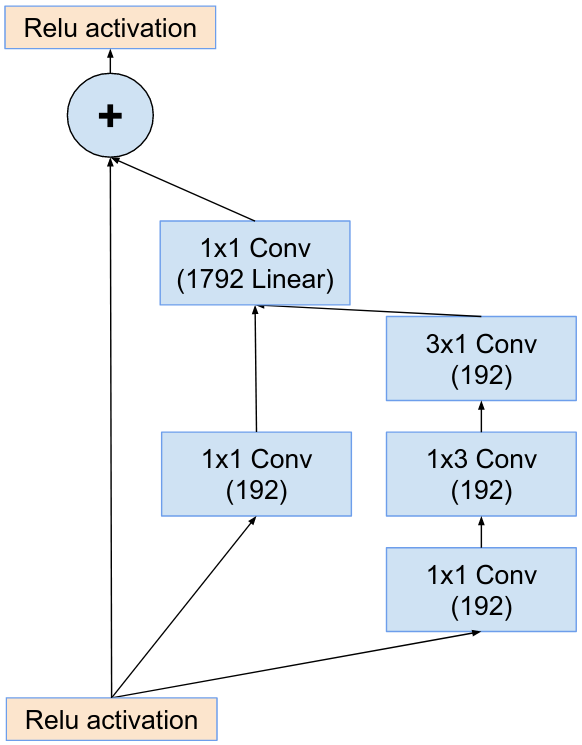
Блок Inception-ResNet-C
Источник изображений (https://arxiv.org/pdf/1602.07261.pdf)

На графиках обучения видно, что улучшения из ResNet помогли и Inception-ResNet-v1:

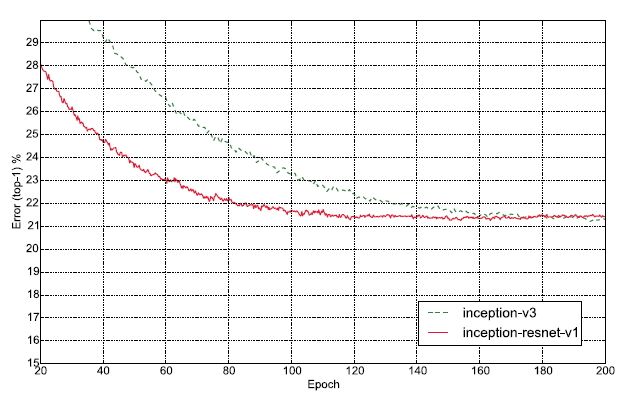
Источник изображения (https://arxiv.org/pdf/1602.07261.pdf)  

Если теперь использовать Stem-блок из Inception-v4 и немного изменить блоки Inception-A, Inception-B, Inception-C в исполнении Inception-ResNet-v1 получим финальное творение авторов — архитектуру **Inception-ResNet-v2:**

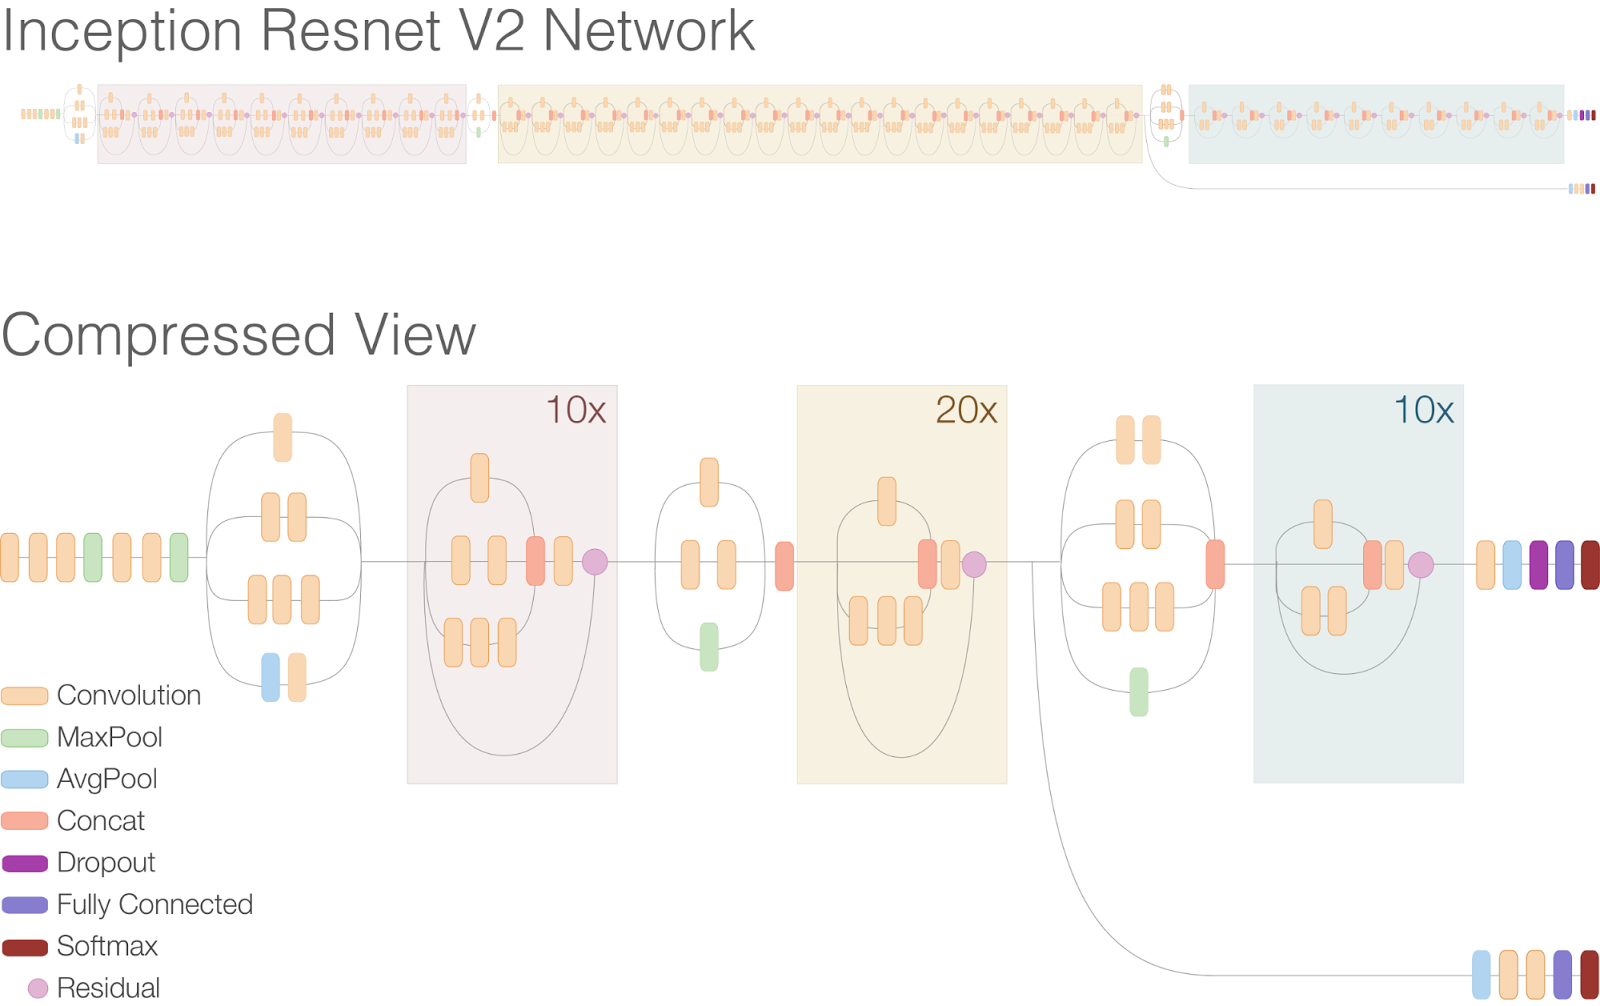  

А что по качеству? Оно стало ещё чуть лучше (усредняли несколько обученных моделей):
 
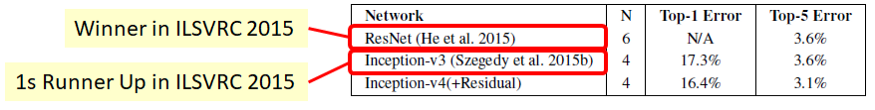  

### ПОДГОТОВКА ДАННЫХ И ОБУЧЕНИЕ МОДЕЛЕЙ

Скачать ноутбук: 